<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>
<li>EDA</li>
<li>Visualizations</li>
</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [ ]:
df = pd.read_csv('/preprocessed_CAC40.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()


,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,Accor,2020-04-03,22.99,23.40,23.40,22.99,67
1,Accor,2020-04-02,23.91,22.99,23.91,22.99,250
2,Accor,2020-04-01,24.10,23.83,24.10,23.83,37
3,Accor,2020-03-31,25.04,25.00,25.24,24.99,336
4,Accor,2020-03-30,26.50,25.02,26.50,24.99,415


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



The closing price is the target column, and it's a numerical column.

Visualize the target column

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,
         800.]), <a list of 10 Text major ticklabel objects>)

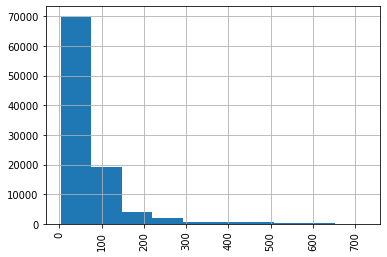

In [ ]:
df['Closing_Price'].hist()
plt.xticks(rotation=90)


# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [ ]:
df.isna().sum().reset_index()


,index,0
0,Name,0
1,Date,0
2,Open,230
3,Closing_Price,2
4,Daily_High,204
5,Daily_Low,204
6,Volume,20453


Visualize the missing values using Missingno library

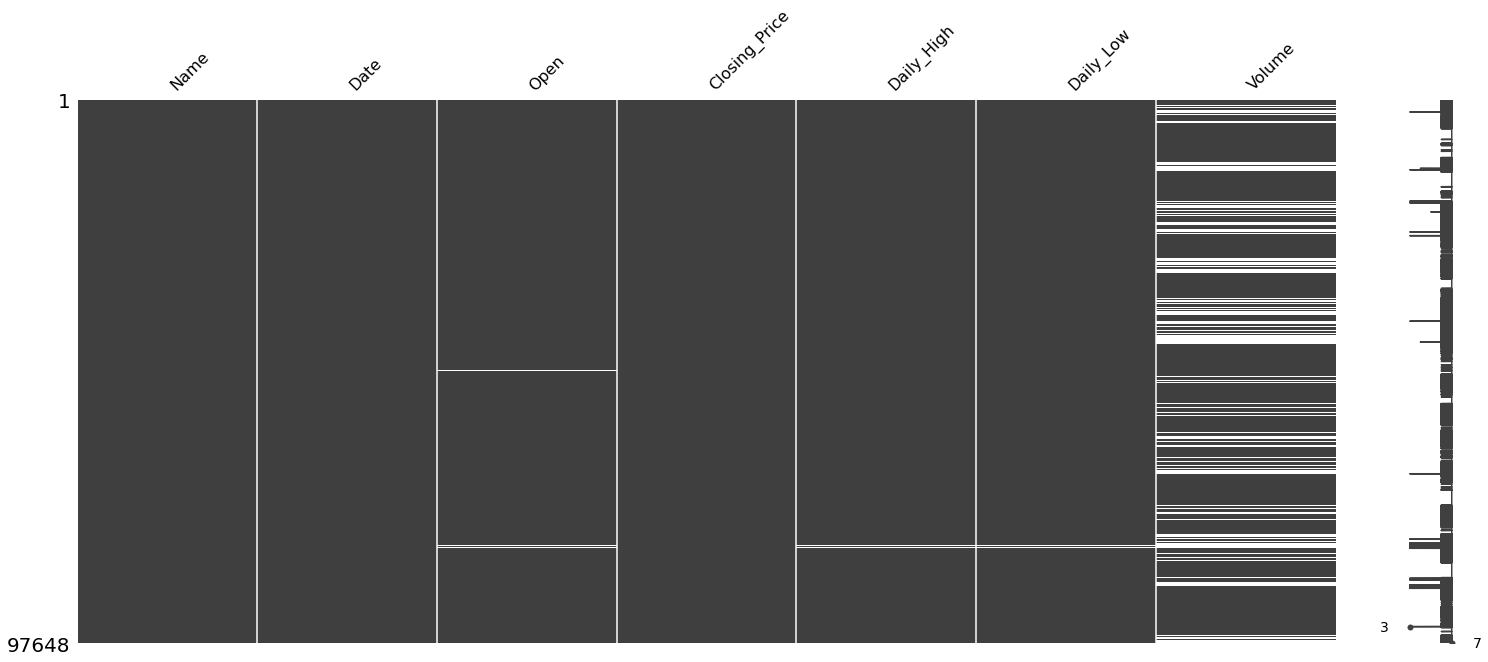

In [ ]:
msno.matrix(df)


## <font color = 'Orange'> Find reasons for the missing values</font> 


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

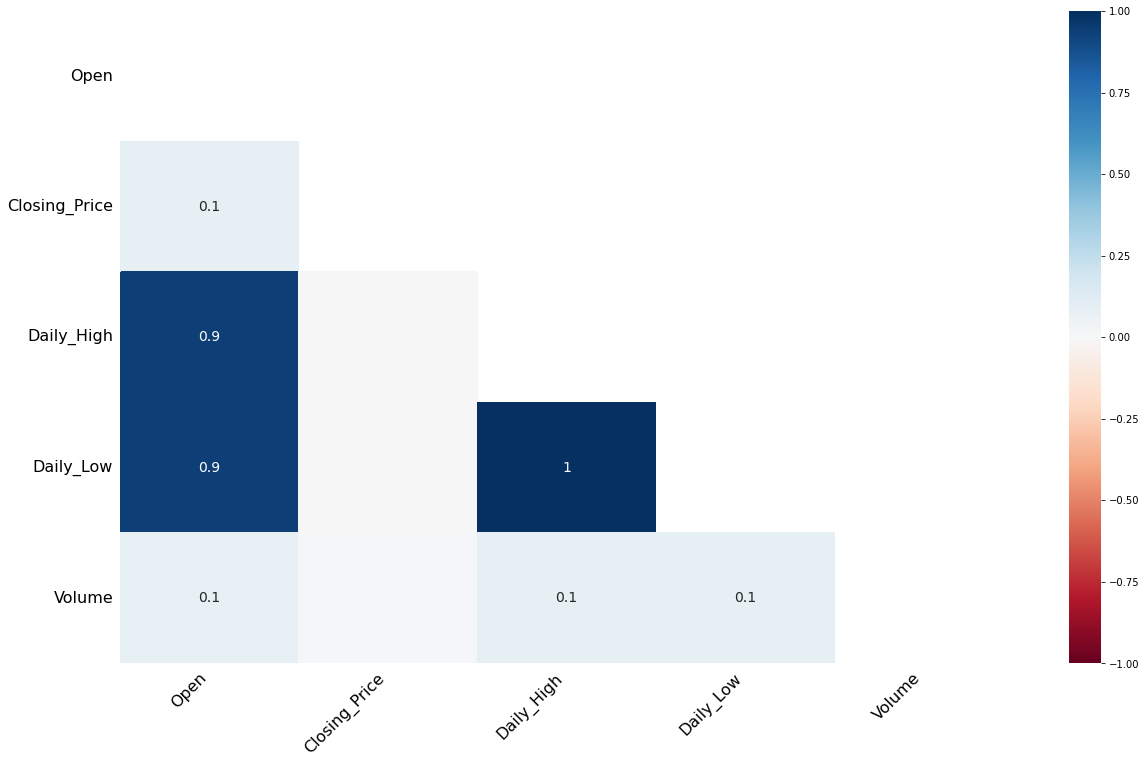

In [ ]:
msno.heatmap(df)


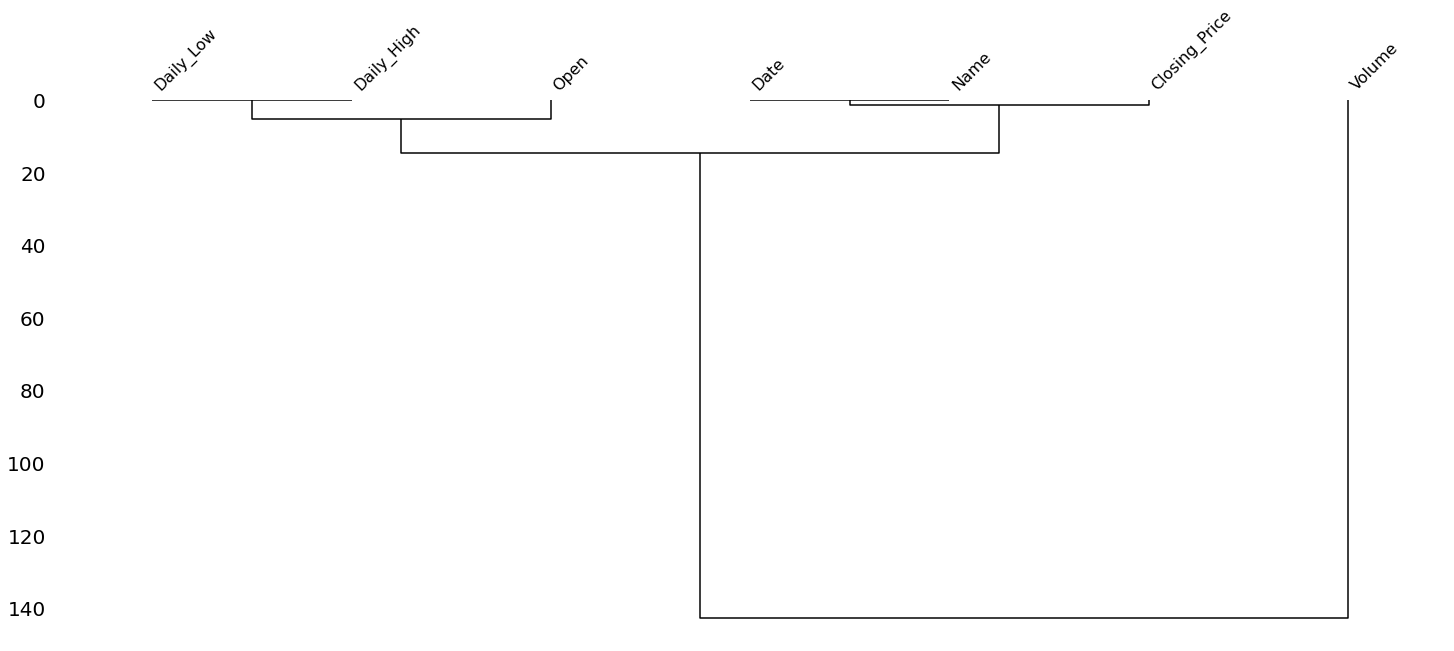

In [ ]:
msno.dendrogram(df)


Write the reasons for the missing values

The correlation is higher for the price attributes, which means that for most days with a missing price, most prices are missing (opening, closing, etc).

## <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [ ]:
df['Volume'].replace(',', '', inplace=True, regex=True)


In [ ]:
scaler = MinMaxScaler()
imputer = KNNImputer()

scale_columns = ['Open', 'Closing_Price', 'Daily_High', 'Daily_Low']
impute_columns = scale_columns + ['Volume']

scaled_df = df.copy(deep=True)

for column in scale_columns:
  scaled_df[column] = scaler.fit_transform(df[column].to_numpy().reshape(-1, 1))

for column in impute_columns:
  scaled_df[column] = imputer.fit_transform(df[column].to_numpy().reshape(-1, 1))


# <font color = 'Orange'> Encode non numerical values </font> 

If this is still not passed on the classes just erase these columns

In [ ]:
encoder = LabelEncoder()

label_columns = ['Name']

for column in label_columns:
  scaled_df[column] = encoder.fit_transform(df[column].to_numpy().reshape(-1, 1))


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [ ]:
df.to_csv('dataset.csv')


Print the first rows of your final Dataset

In [ ]:
scaled_df.head()


,Name,Date,Open,Closing_Price,Daily_High,Daily_Low,Volume
0,1,2020-04-03,22.99,23.40,23.40,22.99,67.0
1,1,2020-04-02,23.91,22.99,23.91,22.99,250.0
2,1,2020-04-01,24.10,23.83,24.10,23.83,37.0
3,1,2020-03-31,25.04,25.00,25.24,24.99,336.0
4,1,2020-03-30,26.50,25.02,26.50,24.99,415.0


#<font color='orange'>EDA</font>

## <font color='Orange'>Find statistic elements for the continuous variables</font>
Like mean, median,  standard deviation, minimum, maximum, quantile,geometric mean

In [ ]:
df.describe()


,Open,Closing_Price,Daily_High,Daily_Low
count,97418.000000,97646.000000,97444.000000,97444.000000
mean,68.737224,68.823124,69.145090,68.357316
std,77.246790,77.267756,77.646032,76.866258
min,3.370000,3.370000,3.410000,3.350000
25%,24.810000,24.840000,24.960000,24.650000
50%,46.880000,46.980000,47.160000,46.640000
75%,81.717500,81.860000,82.220000,81.262500
max,724.000000,724.000000,724.000000,718.000000


In [ ]:
df.median(numeric_only=True)


Open             46.88
Closing_Price    46.98
Daily_High       47.16
Daily_Low        46.64
dtype: float64

In [ ]:
stats.gmean(scaled_df.drop(['Name', 'Date'], axis=1))


array([ 46.33941012,  46.36566407,  46.65550379,  46.03125667,
       918.3151906 ])

## <font color = 'Orange'>Find the frequencies for the categorical variables </font>

In [ ]:
df.describe(exclude=[np.number])


,Name,Date,Volume
count,97648,97648,77195
unique,38,2601,14109
top,EssilorLuxottica,2015-02-11,100
freq,2601,38,779


# <font color = 'Orange'>Data visualization </font>

## <font color = 'Orange'>Find the distribution of given attributes</font>


Which of the attributes(columns) did you choose?


Open, Close, Daily High, Daily Low

**Make the visualizations using histograms, bar charts, etc.**

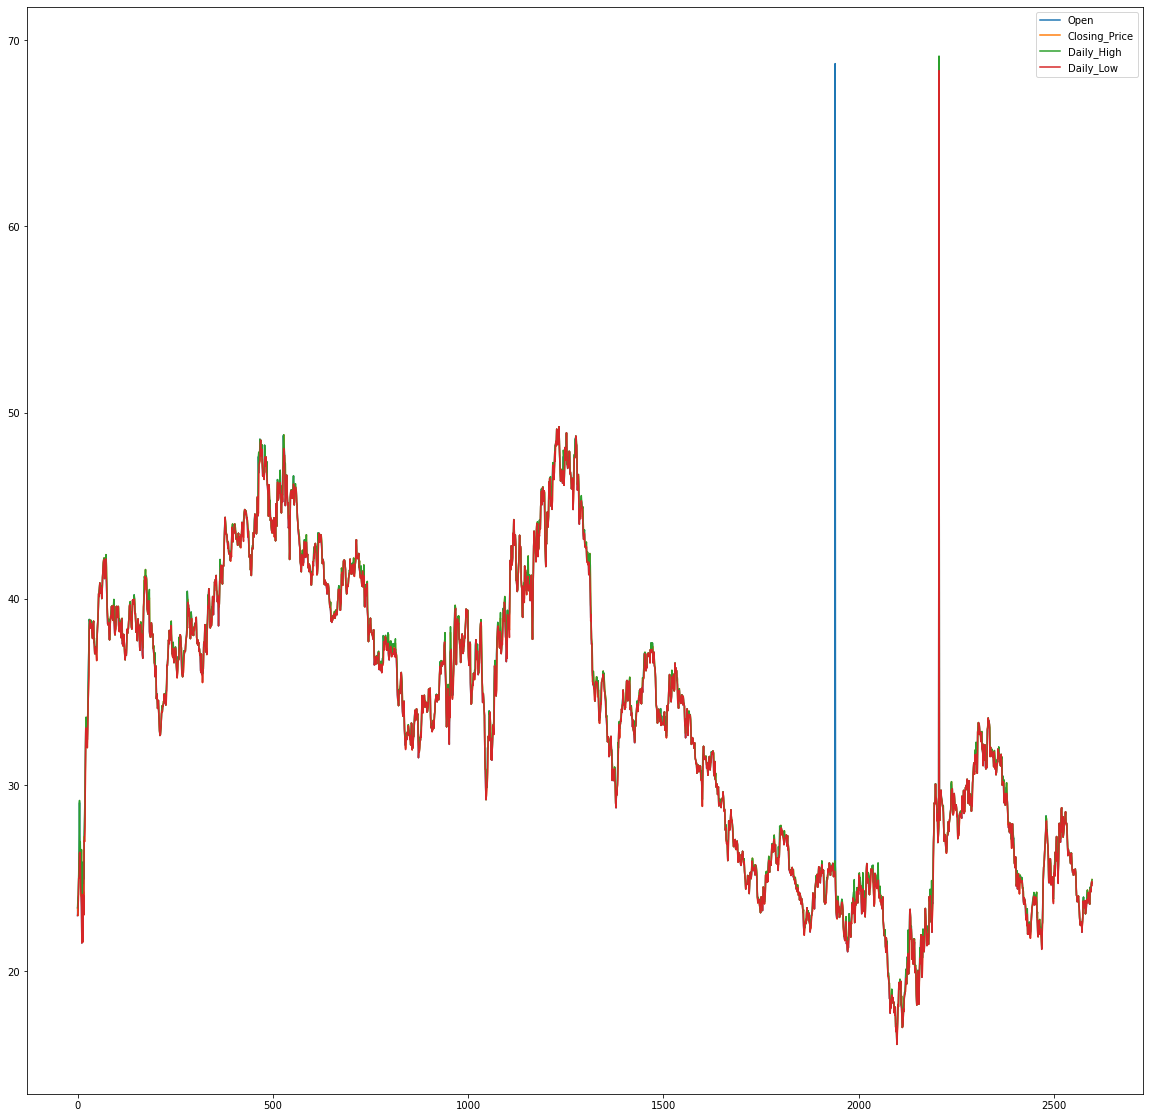

In [ ]:
stocks_1 = scaled_df.loc[scaled_df['Name'] == 1]

stocks_1[scale_columns].plot(figsize=(20, 20))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39c3044850>,
      dtype=object)

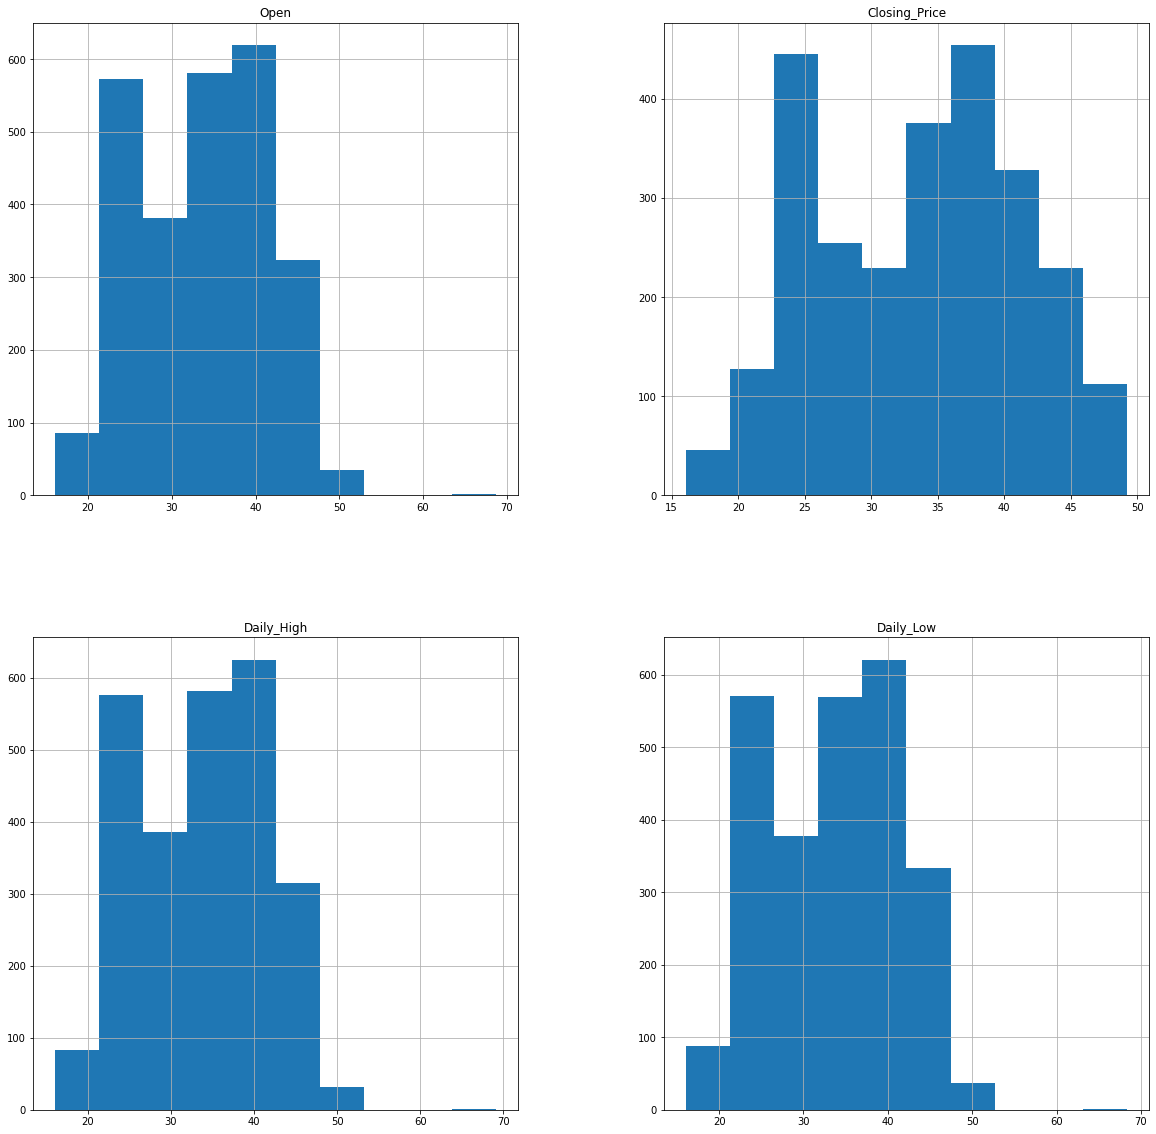

In [ ]:
stocks_1[scale_columns].hist(figsize=(20, 20))


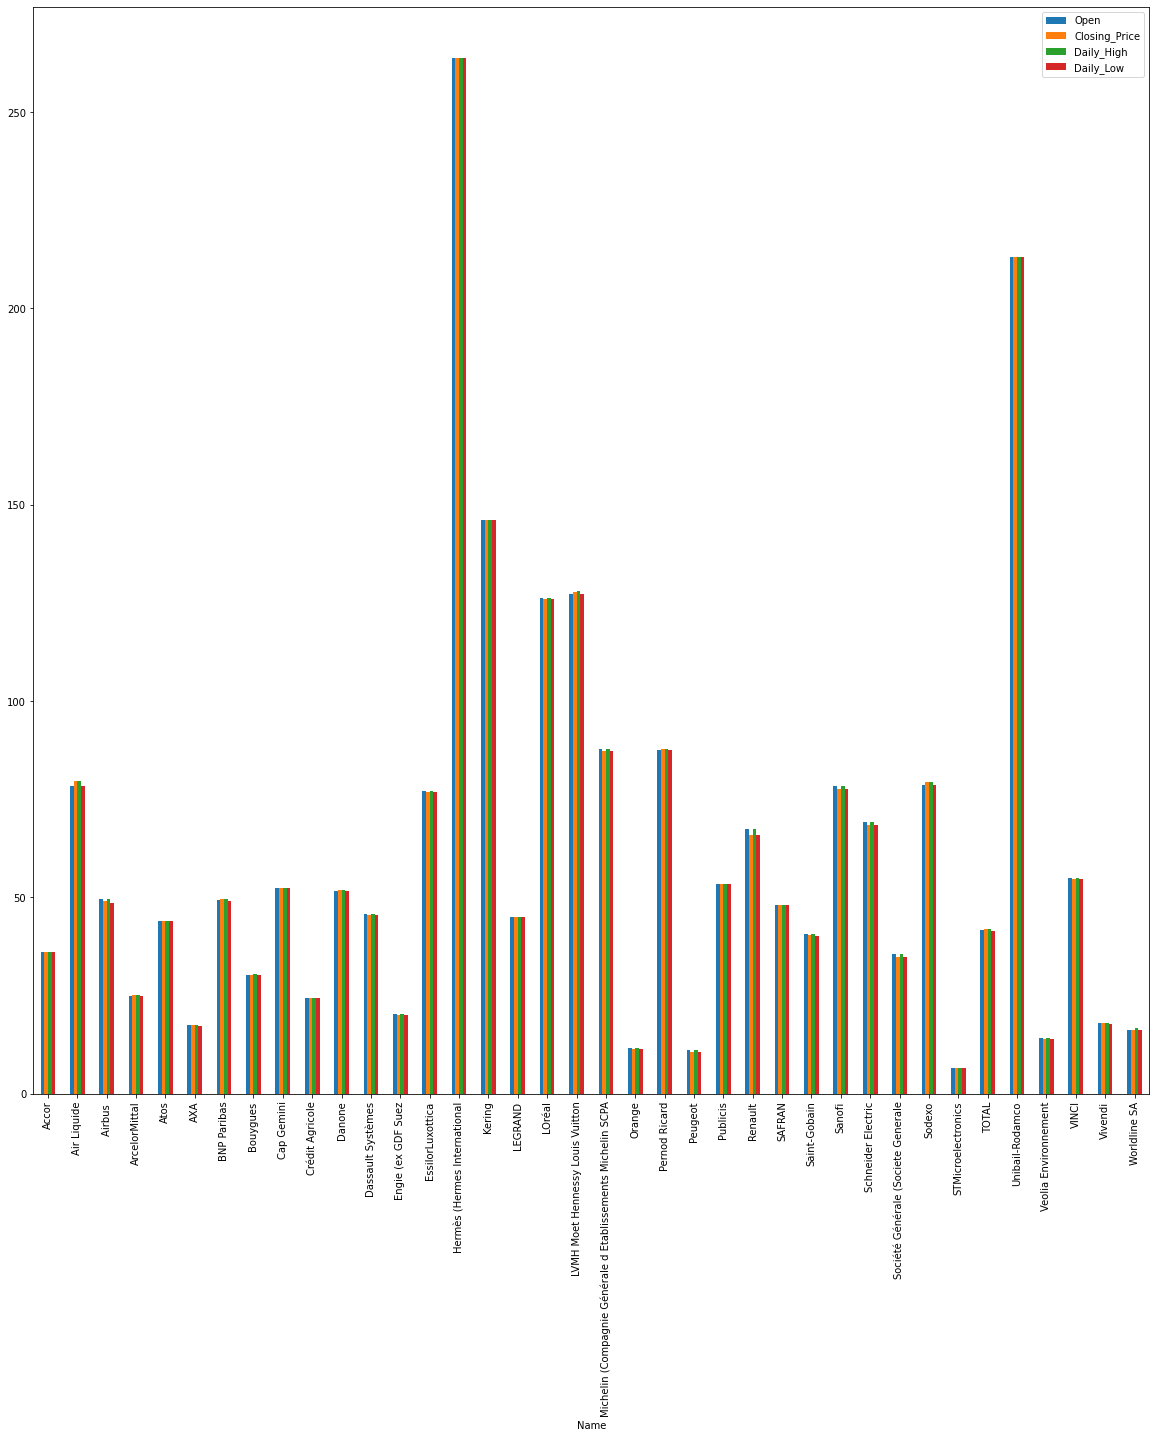

In [ ]:
date = df['Date'].mode().iloc[0]

stocks_at_date = df.loc[df['Date'] == date]

stocks_at_date.plot.bar(x='Name', figsize=(20, 20))


## <font color = 'Orange'>Visualize the relationship between the attributes</font>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39c3f57f10>,
      dtype=object)

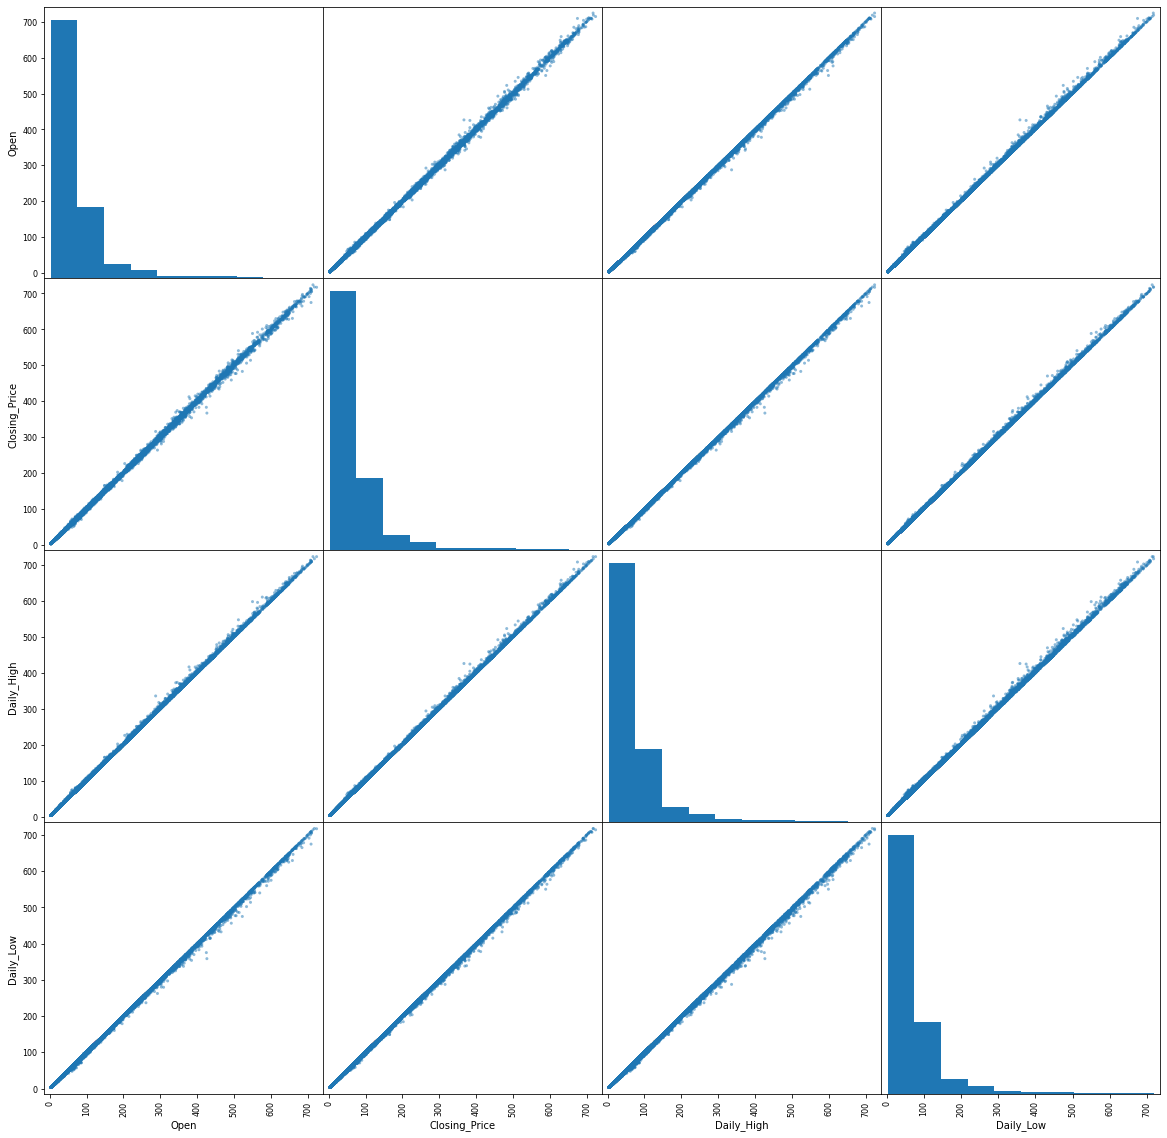

In [ ]:
scatter_matrix(df, figsize=(20, 20))


## <font color = 'Orange'>Make comparison of the columns</font>

Using multiple histograms, box-plots, scatter plots, pairplots, etc.


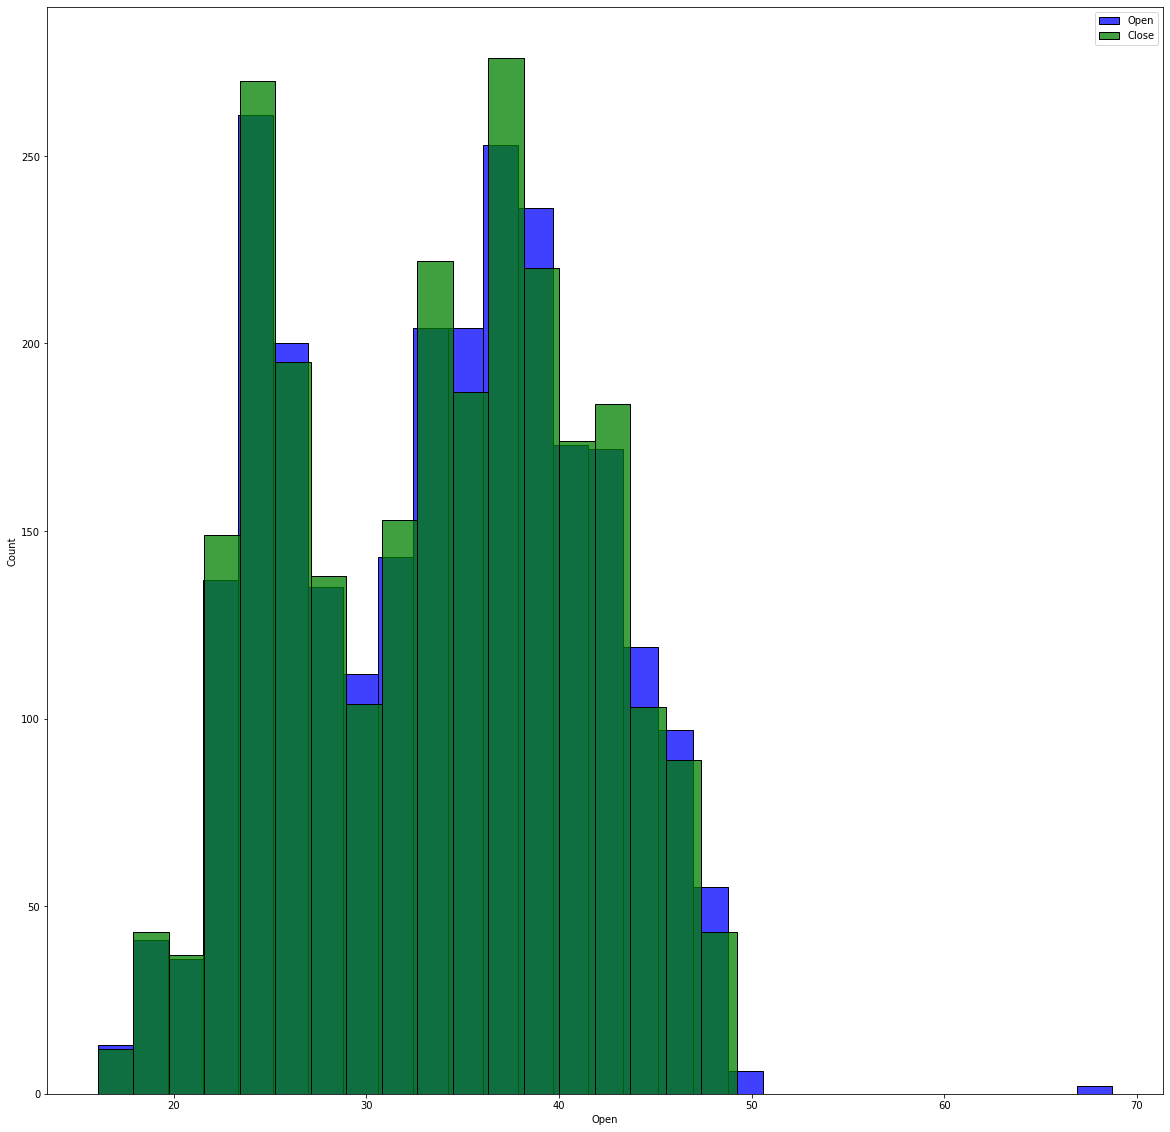

In [ ]:
plt.figure(figsize=(20, 20))

sns.histplot(stocks_1['Open'], color='blue', label='Open')
sns.histplot(stocks_1['Closing_Price'], color='green', label='Close')

plt.legend()


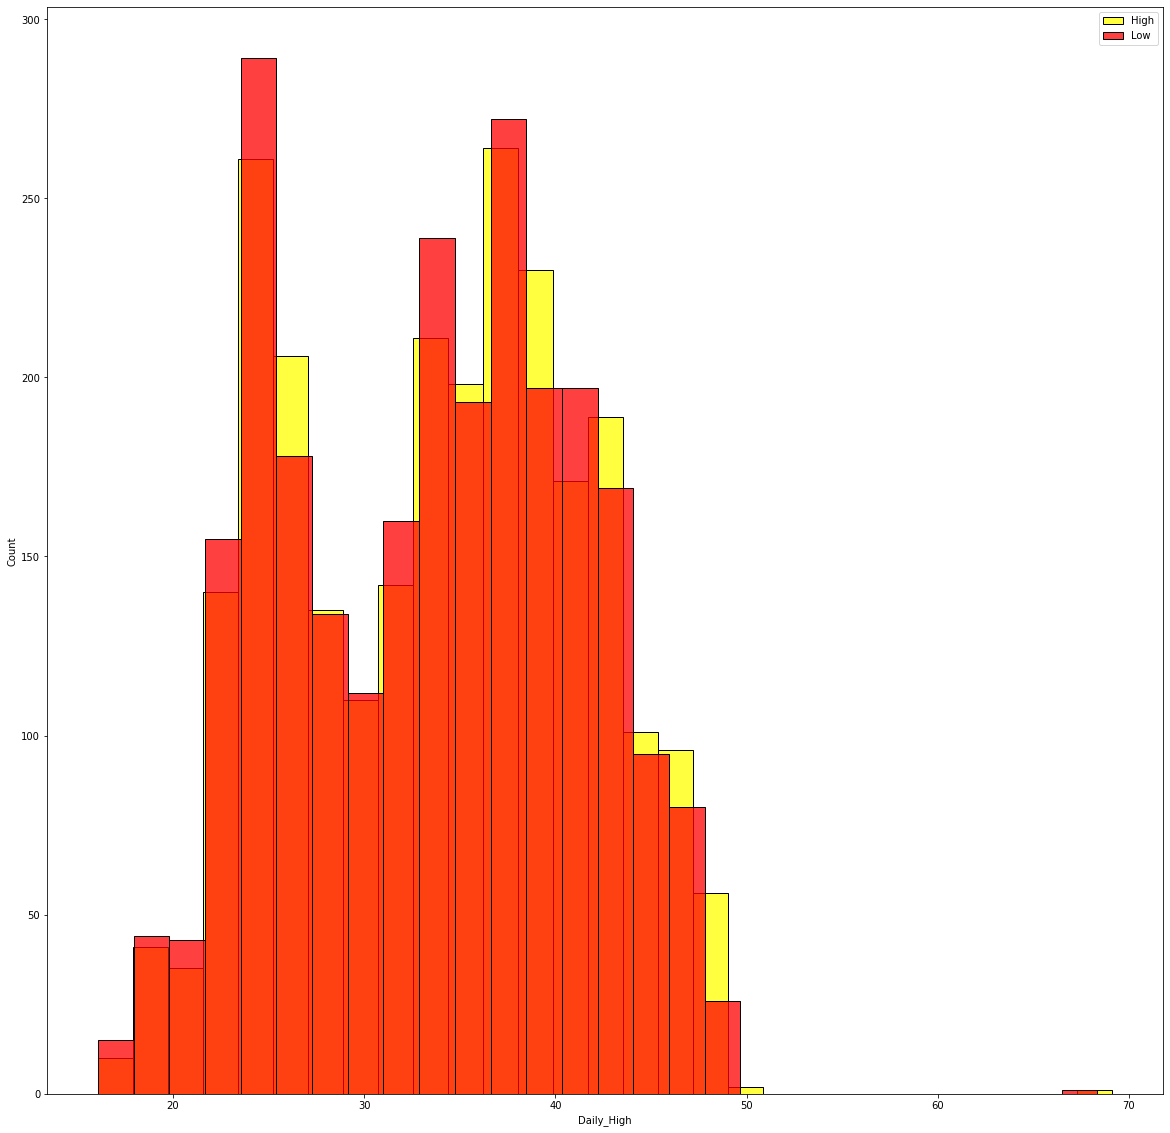

In [ ]:
plt.figure(figsize=(20, 20))

sns.histplot(stocks_1['Daily_High'], color='yellow', label='High')
sns.histplot(stocks_1['Daily_Low'], color='red', label='Low')

plt.legend()


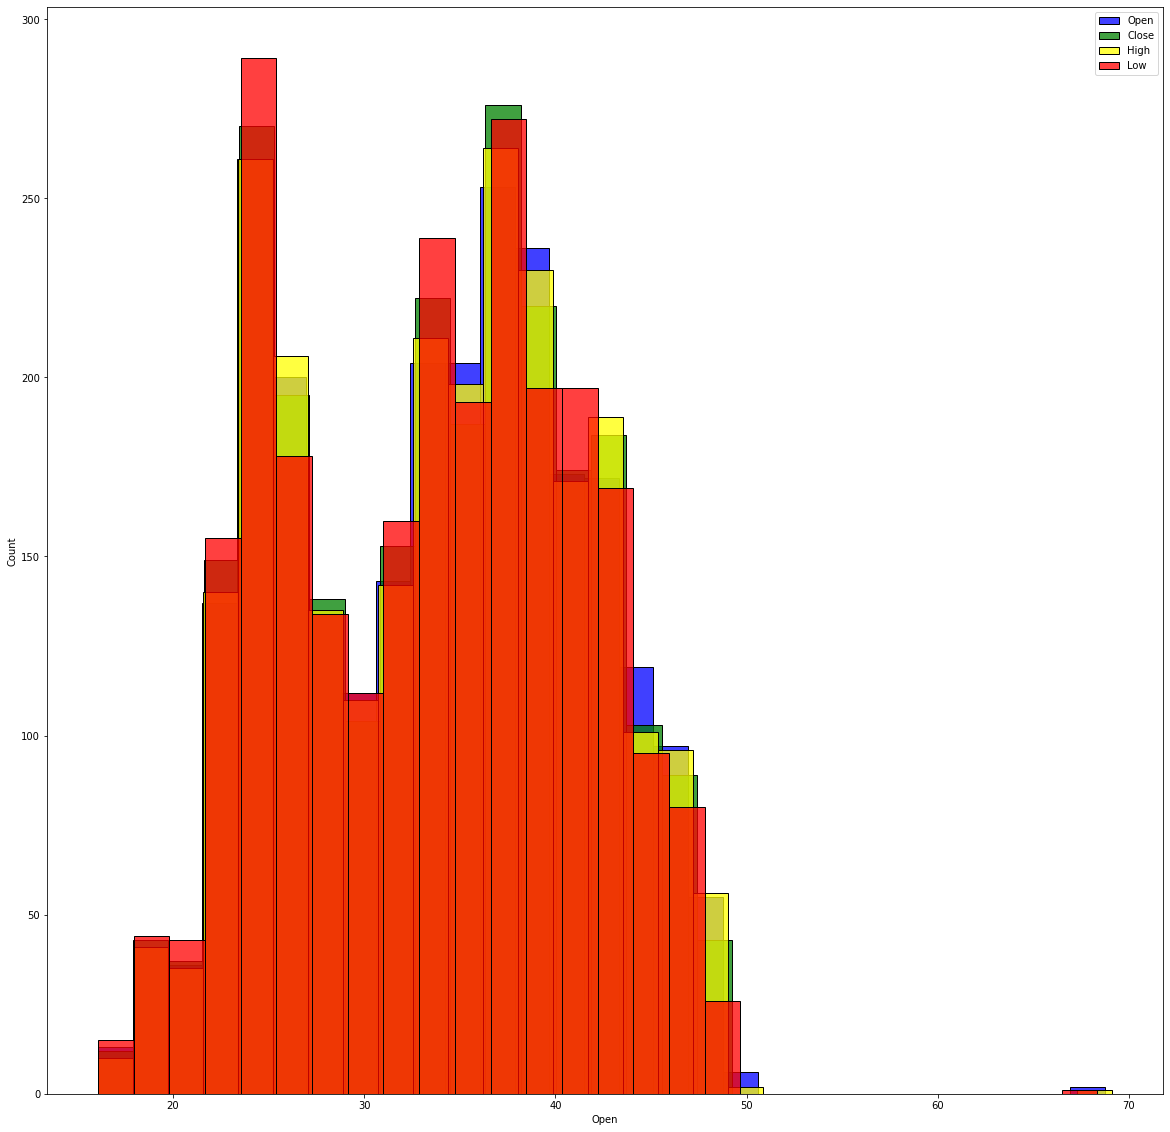

In [ ]:
plt.figure(figsize=(20, 20))

sns.histplot(stocks_1['Open'], color='blue', label='Open')
sns.histplot(stocks_1['Closing_Price'], color='green', label='Close')
sns.histplot(stocks_1['Daily_High'], color='yellow', label='High')
sns.histplot(stocks_1['Daily_Low'], color='red', label='Low')

plt.legend()


# <font color = 'Orange'>EXTRA: Complex visualizations</font> 
For this you will need a basic knowladge of the Plotly library: https://plotly.com/graphing-libraries/
and for deploying the visualization as a web app you will need the Dash library for that take a look of: https://github.com/plotly/dash

